In [105]:
import csv
import numpy as np
import keras
import datetime

print("start at %s" % datetime.datetime.today())
###
# 1.データ準備
###
print("initializing...")
n = 8500              # 入力層の要素数(=データの最大文字数)
k = 3                 # 出力層の要素数(いくつに分類するか)
X=np.empty((0,n),float) # 学習用入力データの行列
Y=np.empty((0,k),float)  # 学習用出力データの行列
X_test=np.empty((0,n),float) # 評価用入力データの行列
Y_test=np.empty((0,k),float) # 評価用出力データの行列

max_rows = 10000  # 読み取り行数最大
learn_ratio = 0.9 # 読み取ったデータのうち学習に使う比率
learn_rows = max_rows * learn_ratio # 学習に使うデータの行数
print("max_rows=%s" % max_rows)
print("learn_rows=%s" % learn_rows)

print("reading data..")
with open('reviews-ccnn-teacher-data02.txt', 'r') as f:
    reader = csv.reader(f,delimiter = '\t')
#    header = next(reader)  # ヘッダーを読み飛ばしたい時

    for i,row in enumerate(reader):
#        print(i,row[0],row[1])          # 1行づつ取得できる
        if (i+1) % 500 == 0:
            print("%s rows read .. %s" % (i+1,datetime.datetime.today()))
        x=[]
        for c in row[1]:
            x.append(np.int.from_bytes(c.encode('utf-8'),'big'))
        xx = np.array(x)
        xx.resize(n,refcheck=False)
        xx = xx.astype('float32')
        y = float(row[0])
        # 上位learn_rows分を学習データ　それ以外を評価データに使う
        # ホントはシャッフルしたほうがいい
        if i < learn_rows:
            X=np.append(X,[xx],axis=0)
            Y = np.append(Y,keras.utils.np_utils.to_categorical(y, k),axis=0)
        else:
            X_test=np.append(X_test,[xx],axis=0)
            Y_test = np.append(Y_test,keras.utils.np_utils.to_categorical(y, k),axis=0)
        if i > max_rows:
            break

print("total %s rows read" % (i-1) )

# Xを３次元の行列に変換。この意味はわからない・・Kerasの都合か。
X=X.reshape(X.shape[0],n,1)
X_test=X_test.reshape(X_test.shape[0],n,1)
# 正規化
X /= 0x1FFFFF
X_test /= 0x1FFFFF

print("initialized at %s" % datetime.datetime.today())


start at 2018-02-07 14:57:15.018681
initializing...
max_rows=10000
learn_rows=9000.0
reading data..
500 rows read..
1000 rows read..
1500 rows read..
2000 rows read..
2500 rows read..
3000 rows read..
3500 rows read..
4000 rows read..
4500 rows read..
5000 rows read..
5500 rows read..
6000 rows read..
6500 rows read..
7000 rows read..
7500 rows read..
8000 rows read..
8500 rows read..
9000 rows read..
9500 rows read..
10000 rows read..
total 10000 rows read
initialized at 2018-02-07 15:35:33.495813


In [106]:
# 学習データの件数確認
X.shape

(9000, 8500, 1)

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adadelta
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers.core import Dropout
from keras.initializers import TruncatedNormal
from keras.layers import Flatten, Conv1D, MaxPooling1D

###
# 2.モデル設定
###
print("building model start at %s" % datetime.datetime.today())
kernel_size = (3)
model = Sequential()
# 入力層
model.add(Conv1D(10, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=(n,1)
                 )
        )
# 畳み込み層
model.add(Conv1D(20, kernel_size, activation='relu'))
# プーリング層
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
# 出力層
model.add(Dense(k, activation='softmax'))

# 確率的勾配降下法
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

print("model built at %s" % datetime.datetime.today())


building model start at 2018-02-07 15:37:19.398867
model built at 2018-02-07 15:37:19.569652


In [108]:
print("learning model start at %s" % datetime.datetime.today())

###
# 3.モデル学習
###
epochs = 12     # 学習繰り返し数
batch_size = 120
hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size,)
#               validation_data=(X_validation ,Y_validation))

print("learned at %s" % datetime.datetime.today())


learning model start at 2018-02-07 15:37:26.010625
Epoch 1/12
9000/9000 [==============================] - 78s - loss: 0.8525 - acc: 0.7154    
Epoch 2/12
9000/9000 [==============================] - 74s - loss: 0.6758 - acc: 0.8882    
Epoch 3/12
9000/9000 [==============================] - 75s - loss: 0.6390 - acc: 0.8882    
Epoch 4/12
9000/9000 [==============================] - 69s - loss: 0.6166 - acc: 0.8882    
Epoch 5/12
9000/9000 [==============================] - 69s - loss: 0.6006 - acc: 0.8882    
Epoch 6/12
9000/9000 [==============================] - 69s - loss: 0.5821 - acc: 0.8882    
Epoch 7/12
9000/9000 [==============================] - 69s - loss: 0.5713 - acc: 0.8882    
Epoch 8/12
9000/9000 [==============================] - 70s - loss: 0.5504 - acc: 0.8882    
Epoch 9/12
9000/9000 [==============================] - 70s - loss: 0.5318 - acc: 0.8882    
Epoch 10/12
9000/9000 [==============================] - 70s - loss: 0.5104 - acc: 0.8882    
Epoch 11/12
9000/9

In [109]:
###
# 4-1.評価
###
loss_and_metrics = model.evaluate(X_test, Y_test)
print()
print(loss_and_metrics)
# 可視化
val_loss = hist.history['loss']
val_acc = hist.history['acc']
print(val_loss)
print(val_acc)

 992/1002 [============================>.] - ETA: 0s
[0.41123545419670149, 0.86626746483191763]
[0.85251361529032388, 0.67576604207356772, 0.63903077602386471, 0.6166468711694082, 0.60064520120620724, 0.58214507063229881, 0.57126584251721702, 0.55036017417907712, 0.53180311004320779, 0.51039050102233885, 0.49696995496749879, 0.48578930894533795]
[0.71544444719950362, 0.88822222630182901, 0.88822222312291466, 0.88822222232818604, 0.88822222550710039, 0.88822222550710039, 0.88822222312291466, 0.88822222471237178, 0.88822222550710039, 0.88822222232818604, 0.88822222232818604, 0.88822222391764327]


In [110]:
###
# 4-2.予測
###

predicted = model.predict(X_test)


In [111]:
predicted[672]


array([ 0.00277503,  0.13273244,  0.86449248], dtype=float32)

In [112]:
Y_test[672]

array([ 0.,  0.,  1.])

In [115]:
Y_test[672][2]

1.0

In [172]:
# ランダムに１０個ほど予測結果を確認
for i in np.random.randint(0,max_rows-learn_rows,10):
    print(i,Y_test[i],predicted[i])
    # ID化したデータを文字列に戻す
    ss = str()
    for xx in (X_test[i] * 0x1FFFFF).reshape(n).astype(int):
        ixx = int(xx)
        ss += (ixx.to_bytes((ixx.bit_length() + 7) // 8,'big')).decode(encoding='utf-8')

    print(ss)




989 [ 0.  0.  1.] [ 0.01953401  0.18816774  0.7922982 ]
マー油の効いた非常に旨いラーメンです^_^ 熊本ラーメンと博多ラーメンの違いが良く分かるラーメンだと思います。 チャーシューも小ぶりですが、旨味タップリですなぁ〜 サイドのチャーハンも抜かり無く旨いです！
585 [ 0.  0.  1.] [  9.01596422e-07   6.52203744e-04   9.99346912e-01]
もう随分と春めいて、天気が良かったりすると気もそぞろな感じになります。穏やかな気持ちでおられるのも、３月末までだろうな・・・と思うと大変貴重な週末。家庭の頼まれごとをささっと午前中に済まして、午後は本屋とコーヒーショップでまったりと過ごして、小腹が空いたということで、おやつ代わりに・・・・宝ソバを頂きました。「宝華らぁめんの油そば」と「中華料理宝華の宝ソバ」と何が違うのか、私にもよく分からないのですが、本店プレミアムの醍醐味ということでございましょうか。武蔵野エリアの代表作「油そば」を、まったりと味わい過ごした春の日でした・・・。  （外観）http://photozou.jp/photo/show/1985094/220171014    【店：大衆中華屋のポリシー感じる威勢の良さがいいね〜！】   　らっしゃいませ〜！、ぁーざしたーー！　などと厨房の中のお兄さんたちの勇ましさ。春ののどかな気分と合わないようで、その大衆お気楽歓迎ぶりが、妙に馴染む東小金井駅前です。一人客はテーブル席がどれだけ空いていようとも、カウンター席に誘導されます。それも詰めるように指示されますが、毎度ことなので常連なる先客や後客たちと「あ、ども」ってな感じでパーソナルスペースを自ら微調整はおてのもの。全員、宝ソバという趣向の完全一致。「お互い好きですな・・・（ニヤリ）」などといった無言で暗黙知を共有します。それにしても話は変わるが、製造原価は低いだろうな〜・・・。こういう製品戦略をいちいち考えなくても勝ち組、金のなる木、競争優位なる一品に、見事に吸い寄せられる私は、思う壺の虫けらですね。  （メニュー）http://photozou.jp/photo/show/1985094/220171052      【タレ：作りたてのドレッシングが

In [155]:
# ID化したデータを文字列に戻す
ss = str()
for xx in (X_test[672] * 0x1FFFFF).reshape(n).astype(int):
#    print(type(int(xx)))
    ixx = int(xx)
    ss += (ixx.to_bytes((ixx.bit_length() + 7) // 8,'big')).decode(encoding='utf-8')

print(ss)

今日は４月５日でラー博を卒業すると言うのをコバトちゃんのレビューで知ったので、故郷宮城の味を卒業する前に食べようとかもめ食堂さんにお邪魔してみた。  気仙沼ラーメンは以前仕事で気仙沼に行ったときに食べたことが有り、素朴な味だが美味しかったので覚えてるんですよね。  向かいの新横浜ウインズで午前中のレースを終えてサクッとランチで訪問すると、なんとかもめ食堂さんは３０分の待ちと一番の人気ですね～当然最後尾に接続して待ちましょうかね。  ２０分ほど並んで待つとやっと券売機の前に到着し、潮味と醤油味で悩むも醤油好きなんで醤油にワンタン入りを選択して食券購入。すると間もなく食券回収と店内に入店と相成りました。  程なくして自分の気仙沼ラーメン醤油味が、店員さんの手によって届けられました。 恒例の記念撮影を済まして、まずはスープを一口。 穏やかな醤油味で魚介がほのかに感じる懐かしい味わいのスープですね。香り付けに秋刀魚の香味油を使っているとのことですが、これが気仙沼の特徴で旨さを引き立たせますよね。  麺は細めの縮れタイプで、茹で加減は適度で歯応え程よく旨いです。麺量は１４０ｇ位だろうか、ワンタンも付けたからお腹的には普通に満足出来ました。  具材はチャーシュー２枚にトッピングのエビワンタン３個・メンマ・なると・刻みネギの布陣です。本当は秋刀魚のツミレが入ってるものと思ってましたが、それは秋刀魚ラーメンの方だけなんですね。少しだけ残念でした。でもチャーシューやエビワンタンも美味しかったので良しとしましょうかね。  自分の故郷は宮城県仙台市なのですが、同じ宮城県でも気仙沼は仙台から遠くてなかなか行けません。なのでこの店が気仙沼でオープンしても食べに行けるなんて事はないだろうから今回食べれて良かったです。と言う事で故郷の味を堪能して本日のラー食が終了と相成りました。  さて、後半のレースも頑張らなくっちゃｗｗ  ご馳走様でした。


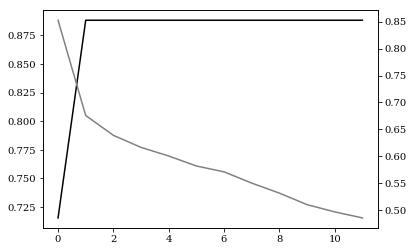

In [113]:
import os

###
# 5.学習の可視化
###

plt.rc('font', family='serif')
fig = plt.figure()
# 精度
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(epochs), val_acc, label='acc', color='black')
# 損失
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epochs), val_loss, label='loss', color='gray')
plt.xlabel('epochs')
#file,ext = os.path.splitext(os.path.basename(__file__))
#plt.savefig(file+'.eps')

plt.show()